
Aufgabe 1
1.	Importieren Sie die erforderlichen Bibliotheken
2. Welche Variablen sind im Datensatz verfügbar?
3. Spaltennamen übersetzen
4. Exploren Sie die Daten
5. Cleaning Sie die Daten
6. Füllen Sie den Nan-Wert mit dem mean
7. Entfernen doppelter Werte
8. Welche Variablen sind numerisch?
9. Welche Variablen sind kategorisch?
10. ÜBERPRÜFEN Sie die value_counts für jeder Variablen
11. Visualisierung der Daten:
• Zeigen Sie ein Diagramm für alle Variablen an
12. Erkennung und Entfernung von Ausreißern (Outliers)
13. Wer ist der ältere Kontakt?
15. Überprüfen Sie die Normalitätsverteilung
16. Überprüfen Sie die Korrelation mit der Bibliothek Seaborn und mit der Bibliothek Klib
17. Splitting des Modells
18. Trainieren und testen Sie den Satz mit der Test_size = 0,3
19. Führen Sie das Modell mit sklearn aus: lineare Regression, knn-Regression
20. Plot the actual value und the predicted value
21. Determinate the mean square errors and r square for each model

AUFGABE 2
1. Überprüfen Sie die Stationarität für jede Variable mit ADF und KPSS
2. Führen Sie das lineare Regressionsmodell aus



-

TASK 1

1. Import the required libraries.
2. Identify the available variables in the dataset.
3. Translate column names.
4. Explore the data.
5. Clean the data.
6. Fill NaN values with the mean.
7. Remove duplicate values.
8. Identify numerical variables.
9. Identify categorical variables.
10. CHECK the value_counts for each variable.
11. Visualize the data:
   - Display a chart for all variables.
12. Detect and remove outliers.
13. Determine the older contact.
15. Check for normality distribution.
16. Check the correlation using Seaborn and Klib libraries.
17. Split the dataset.
18. Train and test the set with Test_size = 0.3.
19. Execute the model using sklearn: linear regression, knn-regression.
20. Plot the actual value and the predicted value.
21. Determine the mean square errors and r-square for each model.

TASK 2

1. Check stationarity for each variable using ADF and KPSS.
2. Execute the linear regression model.


-






1. Import the required libraries.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



2. Identify the available variables in the dataset.

In [137]:
file_path = 'Germany.xlsx'
df = pd.read_excel(file_path, sheet_name='Tabelle1', skiprows=1)
variables_list = list(df.columns)

#Show Variables
print(variables_list)


['Series Name', 'Inflation, consumer prices (annual %)', 'Market capitalization of listed domestic companies (% of GDP)', 'Real effective exchange rate index (2010 = 100)', 'GDP growth (annual %)', 'Gross fixed capital formation (% of GDP)', 'Personal remittances, paid (current US$)', 'Foreign direct investment, net outflows (BoP, current US$)']


3- Spaltennamen übersetzen

In [138]:

# German translation dictionary
translate_dic = {
    'Series Name': 'Name der Serie',
    'Inflation, consumer prices (annual %)': 'Inflation, Verbraucherpreise (jährlich %)',
    'Market capitalization of listed domestic companies (% of GDP)': 'Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)',
    'Real effective exchange rate index (2010 = 100)': 'Realer effektiver Wechselkursindex (2010 = 100)',
    'GDP growth (annual %)': 'Wirtschaftswachstum (jährlich %)',
    'Gross fixed capital formation (% of GDP)': 'Bruttoanlageinvestitionen (% des BIP)',
    'Personal remittances, paid (current US$)': 'Persönliche Überweisungen (aktuelle US$)',
    'Foreign direct investment, net outflows (BoP, current US$)': 'Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'
}

# Rename the columns
df.rename(columns=translate_dic, inplace=True)

# Display the updated DataFrame
df.head()


,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP),Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP),Persönliche Überweisungen (aktuelle US$),"Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)"
0,1997,1.939369,37.307261,110.190012,1.792161,22.650639,9473507979.141439,49529035003.912102
1,1998,0.911185,48.872578,110.367325,2.013933,22.798225,9108082670.55018,97004412840.271698
2,1999,0.585433,65.248414,106.891468,1.887261,23.038680,10088645451.1654,139402049693.11499
3,2000,1.440268,65.208158,99.680307,2.912503,23.114329,8662856855.468519,98172100562.192001
4,2001,1.983857,55.080363,99.664381,1.681468,21.778195,9184539370.74823,70242086898.7686


4. Explore the data

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name der Serie                                                            25 non-null     int64  
 1   Inflation, Verbraucherpreise (jährlich %)                                 25 non-null     float64
 2   Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)  25 non-null     object 
 3   Realer effektiver Wechselkursindex (2010 = 100)                           25 non-null     float64
 4   Wirtschaftswachstum (jährlich %)                                          25 non-null     float64
 5   Bruttoanlageinvestitionen (% des BIP)                                     25 non-null     float64
 6   Persönliche Überweisungen (aktuelle US$)                             

In [140]:
df.describe()

,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP)
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2009.000000,1.451473,101.080698,1.255694,20.710421
std,7.359801,0.706022,5.317624,2.291136,1.256366
min,1997.000000,0.312738,92.539195,-5.693836,19.076699
25%,2003.000000,0.911185,97.023625,0.731707,19.901471
50%,2009.000000,1.504721,99.680307,1.681468,20.302966
75%,2015.000000,1.939369,105.881615,2.680231,21.778195
max,2021.000000,3.142970,110.367325,4.179882,23.114329


5. Cleaning Sie die Daten
6. Füllen Sie den Nan-Wert mit dem mean

In [144]:
df['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)'] = pd.to_numeric(df['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)'], errors='coerce')
df['Persönliche Überweisungen (aktuelle US$)'] = pd.to_numeric(df['Persönliche Überweisungen (aktuelle US$)'], errors='coerce')
df['Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'] = pd.to_numeric(df['Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'], errors='coerce')

# Theses lines are converting a specified column in the DataFrame (for exemple 'Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)') to numeric values. 
# If there are any errors during the conversion, they will be replaced with NaN.


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name der Serie                                                            25 non-null     int64  
 1   Inflation, Verbraucherpreise (jährlich %)                                 25 non-null     float64
 2   Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)  24 non-null     float64
 3   Realer effektiver Wechselkursindex (2010 = 100)                           25 non-null     float64
 4   Wirtschaftswachstum (jährlich %)                                          25 non-null     float64
 5   Bruttoanlageinvestitionen (% des BIP)                                     25 non-null     float64
 6   Persönliche Überweisungen (aktuelle US$)                             

In [150]:
df.describe()

,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP),Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP),Persönliche Überweisungen (aktuelle US$),"Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)"
count,25.000000,25.000000,24.000000,25.000000,25.000000,25.000000,2.400000e+01,2.400000e+01
mean,2009.000000,1.451473,47.827880,101.080698,1.255694,20.710421,1.450647e+10,1.053879e+11
std,7.359801,0.706022,10.360161,5.317624,2.291136,1.256366,3.926487e+09,4.502172e+10
min,1997.000000,0.312738,29.652906,92.539195,-5.693836,19.076699,8.662857e+09,9.069678e+09
25%,2003.000000,0.911185,42.118171,97.023625,0.731707,19.901471,1.120635e+10,9.220132e+10
50%,2009.000000,1.504721,46.787761,99.680307,1.681468,20.302966,1.495928e+10,1.036211e+11
75%,2015.000000,1.939369,54.782741,105.881615,2.680231,21.778195,1.784842e+10,1.397149e+11
max,2021.000000,3.142970,65.248414,110.367325,4.179882,23.114329,2.169912e+10,1.959217e+11


In [153]:
df.head(30)

,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP),Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP),Persönliche Überweisungen (aktuelle US$),"Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)"
0,1997,1.939369,37.307261,110.190012,1.792161,22.650639,9.473508e+09,4.952904e+10
1,1998,0.911185,48.872578,110.367325,2.013933,22.798225,9.108083e+09,9.700441e+10
2,1999,0.585433,65.248414,106.891468,1.887261,23.038680,1.008865e+10,1.394020e+11
3,2000,1.440268,65.208158,99.680307,2.912503,23.114329,8.662857e+09,9.817210e+10
4,2001,1.983857,55.080363,99.664381,1.681468,21.778195,9.184539e+09,7.024209e+10
5,2002,1.420806,33.005468,100.721455,-0.197974,20.121786,1.012652e+10,1.720272e+10
6,2003,1.034228,43.132748,106.129382,-0.700117,19.523325,1.156629e+10,3.930084e+10
7,2004,1.665733,42.443731,107.648542,1.175088,19.091014,1.260740e+10,9.069678e+09
8,2005,1.546910,42.226681,105.217652,0.731707,19.076699,1.270566e+10,8.892534e+10
9,2006,1.577428,54.683534,104.255132,3.816442,19.802900,1.270504e+10,1.479753e+11


8. Identify numerical variables.
9. Identify categorical variables.

In [155]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)


Numerical Variables:
Index(['Name der Serie', 'Inflation, Verbraucherpreise (jährlich %)',
       'Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)',
       'Realer effektiver Wechselkursindex (2010 = 100)',
       'Wirtschaftswachstum (jährlich %)',
       'Bruttoanlageinvestitionen (% des BIP)',
       'Persönliche Überweisungen (aktuelle US$)',
       'Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'],
      dtype='object')

Categorical Variables:
Index([], dtype='object')


10. ÜBERPRÜFEN Sie die value_counts für jeder Variablen

In [156]:

for column in your_dataframe.columns:
    print(f"\nValue Counts for {column}:")
    print(your_dataframe[column].value_counts())


NameError: name 'your_dataframe' is not defined

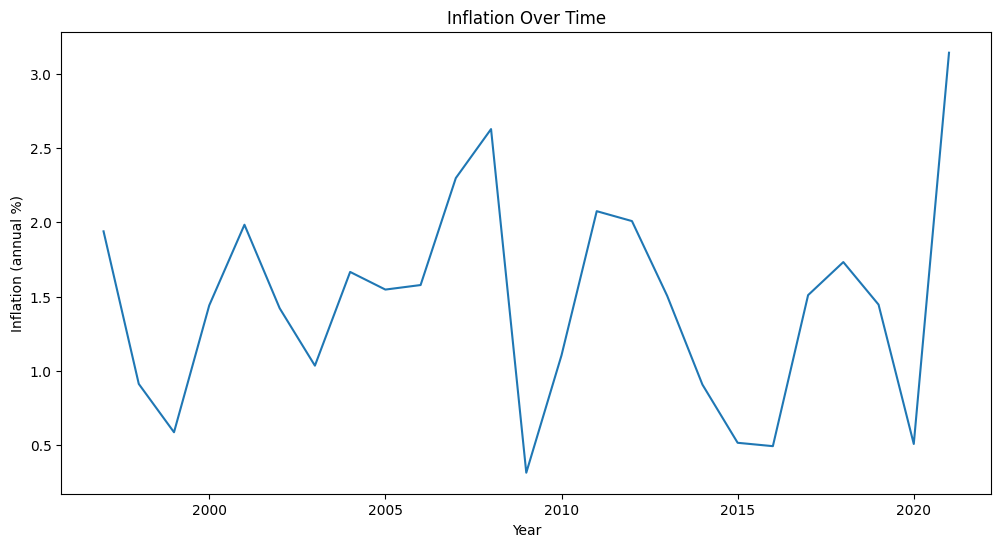

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Name der Serie', y='Inflation, Verbraucherpreise (jährlich %)')
plt.title('Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation (annual %)')
plt.show()


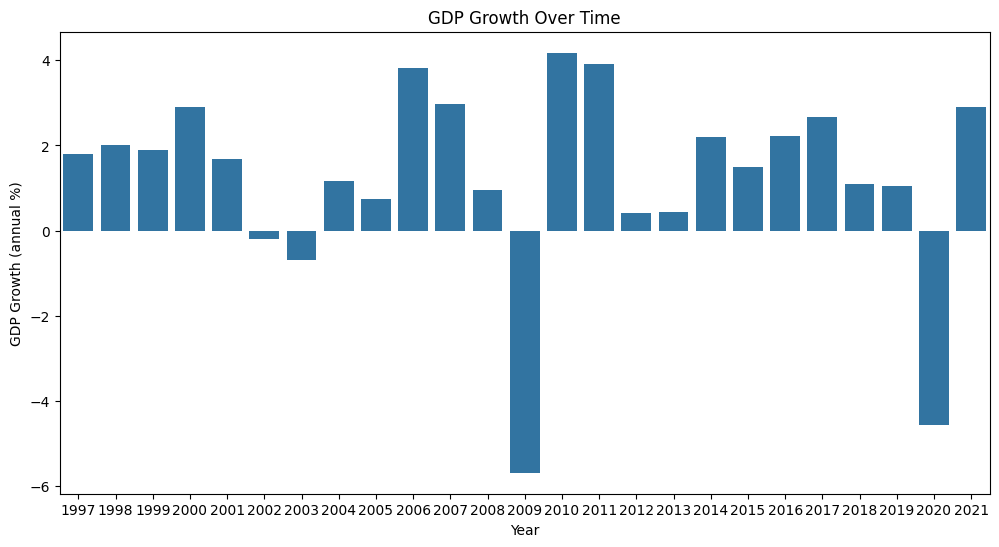

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Name der Serie', y='Wirtschaftswachstum (jährlich %)')
plt.title('GDP Growth Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth (annual %)')
plt.show()


In [ ]:
df['Inflation, Verbraucherpreise (jährlich %)'].mean()

1.4514732942196031

In [ ]:
5. Clean the data